# Fake News Detection




## Objective


The objective of this assignment is to develop a Semantic Classification model. You will be using Word2Vec method to extract the semantic relations from the text and develop a basic understanding of how to train supervised models to categorise text based on its meaning, rather than just syntax. You will explore how this technique is used in situations where understanding textual meaning plays a critical role in making accurate and efficient decisions.


## Business Objective

The spread of fake news has become a significant challenge in today’s digital world. With the massive volume of news articles published daily, it’s becoming harder to distinguish between credible and misleading information. This creates a need for systems that can automatically classify news articles as true or fake, helping to reduce misinformation and protect public trust.


In this assignment, you will develop a Semantic Classification model that uses the Word2Vec method to detect recurring patterns and themes in news articles. Using supervised learning models, the goal is to build a system that classifies news articles as either fake or true.


<h2> Pipelines that needs to be performed </h2>

You need to perform the following tasks to complete the assignment:

<ol type="1">

  <li> Data Preparation
  <li> Text Preprocessing
  <li> Train Validation Split
  <li> EDA on Training Data
  <li> EDA on Validation Data [Optional]
  <li> Feature Extraction
  <li> Model Training and Evaluation

</ol>

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Dictionary


For this assignment, you will work with two datasets, `True.csv` and `Fake.csv`.
Both datasets contain three columns:
<ul>
  <li> title of the news article
  <li> text of the news article
  <li> date of article publication
</ul>

`True.csv` dataset includes 21,417 true news, while the `Fake.csv` dataset comprises 23,502 fake news.

## Installing required Libraries

In [1]:
!pip install --upgrade numpy==1.26.4
!pip install --upgrade pandas==2.2.2
!pip install --upgrade nltk==3.9.1
!pip install --upgrade spacy==3.7.5
!pip install --upgrade scipy==1.12
!pip install --upgrade pydantic==2.10.5
!pip install wordcloud==1.9.4
!python -m spacy download en_core_web_sm
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 72.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.0/865.0 kB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 45.3 MB/s eta 0:00:00
  Attempting uninstall: blis
    Found existing installation: blis 1.3.0
    Uninstalling blis-1.3.0:
      Successfully uninstalled blis-1.3.0
  Attempting uninstall: thinc
    Found existing installation: thinc 8.3.6
    Uninstalling thinc-8.3.6:
      Successfully uninstalled thinc-8.3.6
  Attempting uninstall: spacy
    Found existing installation: spacy 3.8.7
    Uninstalling spacy-3.8.7:
      Successfully uninstalled spacy-3.8.7
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.8/37.8 MB 22.4 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's 

## Importing the necessary libraries

In [2]:
# Import essential libraries for data manipulation and analysis
import numpy as np  # For numerical operations and arrays
import pandas as pd  # For working with dataframes and structured data
import re  # For regular expression operations (text processing)
import nltk  # Natural Language Toolkit for text processing
import spacy  # For advanced NLP tasks
import string  # For handling string-related operations

# Optional: Uncomment the line below to enable GPU support for spaCy (if you have a compatible GPU)
#spacy.require_gpu()

# Load the spaCy small English language model
nlp = spacy.load("en_core_web_sm")

# For data visualization
import seaborn as sns  # Data visualization library for statistical graphics
import matplotlib.pyplot as plt  # Matplotlib for creating static plots
# Configure Matplotlib to display plots inline in Jupyter Notebook
%matplotlib inline

# Suppress unnecessary warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

# For interactive plots
from plotly.offline import plot  # Enables offline plotting with Plotly
import plotly.graph_objects as go  # For creating customizable Plotly plots
import plotly.express as px  # A high-level interface for Plotly

# For preprocessing and feature extraction in machine learning
from sklearn.feature_extraction.text import (  # Methods for text vectorization
    CountVectorizer,  # Converts text into a bag-of-words model
)

# Import accuracy, precision, recall, f_score from sklearn to predict train accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Pretty printing for better readability of output
from pprint import pprint

# For progress tracking in loops (useful for larger datasets)
from tqdm import tqdm, tqdm_notebook  # Progress bar for loops
tqdm.pandas()  # Enables progress bars for pandas operations


In [3]:
## Change the display properties of pandas to max
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Load the data

Load the True.csv and Fake.csv files as DataFrames

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
true_df = pd.read_csv('/content/drive/MyDrive/nlp/True.csv')
fake_df = pd.read_csv('/content/drive/MyDrive/nlp/Fake.csv')

## **1.** Data Preparation  <font color = red>[10 marks]</font>





### **1.0** Data Understanding

In [6]:
# Inspect the DataFrame with True News to understand the given data
print(true_df.head())        # First 5 rows
print(true_df.tail())        # Last 5 rows
print(true_df.info())        # DataFrame summary
print(true_df.describe())    # Numerical summary
print(true_df.shape)         # (rows, columns)
print(true_df.columns)

                                                                   title  \
0       As U.S. budget fight looms, Republicans flip their fiscal script   
1       U.S. military to accept transgender recruits on Monday: Pentagon   
2           Senior U.S. Republican senator: 'Let Mr. Mueller do his job'   
3            FBI Russia probe helped by Australian diplomat tip-off: NYT   
4  Trump wants Postal Service to charge 'much more' for Amazon shipments   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [7]:
# Inspect the DataFrame with Fake News to understand the given data
print(fake_df.head())        # First 5 rows
print(fake_df.tail())        # Last 5 rows
print(fake_df.info())        # DataFrame summary
print(fake_df.describe())    # Numerical summary
print(fake_df.shape)         # (rows, columns)
print(fake_df.columns)

                                                                                        title  \
0              Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing   
1                        Drunk Bragging Trump Staffer Started Russian Collusion Investigation   
2   Sheriff David Clarke Becomes An Internet Joke For Threatening To Poke People ‘In The Eye’   
3               Trump Is So Obsessed He Even Has Obama’s Name Coded Into His Website (IMAGES)   
4                       Pope Francis Just Called Out Donald Trump During His Christmas Speech   

                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [8]:
# Print the column details for True News DataFrame
print(true_df.columns)


Index(['title', 'text', 'date'], dtype='object')


In [9]:
# Print the column details for Fake News Dataframe
print(fake_df.columns)


Index(['title', 'text', 'date'], dtype='object')


In [10]:
# Print the column names of both DataFrames
print("Columns in True News DataFrame:")
print(list(true_df.columns))

print("\nColumns in Fake News DataFrame:")
print(list(fake_df.columns))

Columns in True News DataFrame:
['title', 'text', 'date']

Columns in Fake News DataFrame:
['title', 'text', 'date']


### **1.1** Add new column  <font color = red>[3 marks]</font> <br>

Add new column `news_label` to both the DataFrames and assign labels

In [11]:
# Add a new column 'news_label' to the true news DataFrame and assign the label "1" to indicate that these news are true
true_df['news_label'] = 1

# Add a new column 'news_label' to the fake news DataFrame and assign the label "0" to indicate that these news are fake
fake_df['news_label'] = 0


### **1.2** Merge DataFrames  <font color = red>[2 marks]</font> <br>

Create a new Dataframe by merging True and Fake DataFrames

In [12]:
# Combine the true and fake news DataFrames into a single DataFrame
combined_df = pd.concat([true_df, fake_df], ignore_index=True)


In [13]:
# Display the first 5 rows of the combined DataFrame to verify the result
combined_df.head(5)

title  \
0       As U.S. budget fight looms, Republicans flip their fiscal script   
1       U.S. military to accept transgender recruits on Monday: Pentagon   
2           Senior U.S. Republican senator: 'Let Mr. Mueller do his job'   
3            FBI Russia probe helped by Australian diplomat tip-off: NYT   
4  Trump wants Postal Service to charge 'much more' for Amazon shipments   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

### **1.3** Handle the null values  <font color = red>[2 marks]</font> <br>

Check for null values and handle it by imputation or dropping the null values

In [14]:
# Check Presence of Null Values
print(combined_df.isnull().sum())

#percenatge of missing
percent_missing = combined_df.isnull().sum() * 100 / len(combined_df)
print(percent_missing)


title         21
text          21
date          42
news_label     0
dtype: int64
title         0.046729
text          0.046729
date          0.093458
news_label    0.000000
dtype: float64


In [15]:
# Handle Rows with Null Values
combined_df = combined_df.dropna()
print(combined_df.isnull().sum())


title         0
text          0
date          0
news_label    0
dtype: int64


### **1.4** Merge the relevant columns and drop the rest from the DataFrame  <font color = red>[3 marks]</font> <br>

Combine the relevant columns into a new column `news_text` and then drop irrelevant columns from the DataFrame

In [16]:
# Combine the relevant columns into a new column 'news_text' by joining their values with a space
combined_df['news_text'] = combined_df['title'].astype(str) + ' ' + combined_df['text'].astype(str) + ' ' + combined_df['date'].astype(str)

# Drop the irrelevant columns from the DataFrame as they are no longer needed
combined_df = combined_df.drop(columns=['title', 'text', 'date'])

# Display the first 5 rows of the updated DataFrame to check the result
print(combined_df.head())


   news_label  \
0           1   
1           1   
2           1   
3           1   
4           1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

## **2.** Text Preprocessing <font color = red>[15 marks]</font> <br>






On all the news text, you need to:
<ol type=1>
  <li> Make the text lowercase
  <li> Remove text in square brackets
  <li> Remove punctuation
  <li> Remove words containing numbers
</ol>


Once you have done these cleaning operations you need to perform POS tagging and lemmatization on the cleaned news text, and remove all words that are not tagged as NN or NNS.

### **2.1** Text Cleaning  <font color = red>[5 marks]</font> <br>



#### 2.1.0 Create a new DataFrame to store the processed data



In [17]:
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)               # Remove text in square brackets
    text = text.translate(str.maketrans('', '', string.punctuation))   # Remove punctuation
    text = ' '.join(word for word in text.split() if not re.search(r'\d', word))  # Remove words with numbers
    return text

combined_df['cleaned_text'] = combined_df['news_text'].apply(clean_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [18]:
import nltk
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(nltk_pos_tag):
    if nltk_pos_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_pos_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_pos_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def lemmatize_and_filter(text):
    tokens = word_tokenize(text)
    pos_tags = nltk.pos_tag(tokens)
    filtered_lemmas = []
    for word, tag in pos_tags:
        if tag in ['NN', 'NNS']:             # Keep only singular/plural nouns
            lemma = lemmatizer.lemmatize(word, get_wordnet_pos(tag))
            filtered_lemmas.append(lemma)
    return ' '.join(filtered_lemmas)

combined_df['lemmatized_text'] = combined_df['cleaned_text'].apply(lemmatize_and_filter)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


In [19]:
# Create a DataFrame('df_clean') that will have only the cleaned news text and the lemmatized news text with POS tags removed
df_clean = combined_df[['cleaned_text', 'lemmatized_text', 'news_label']].copy()


# Add 'news_label' column to the new dataframe for topic identification
df_clean['news_label'] = combined_df['news_label']


#### 2.1.1 Write the function to clean the text and remove all the unnecessary elements  <font color = red>[4 marks]</font> <br>



In [20]:
# Write the function here to clean the text and remove all the unnecessary elements
def clean_text(text):
# Convert to lower case
      text = text.lower()
# Remove text in square brackets
      text = re.sub(r'\[.*?\]', '', text)
# Remove punctuation
      text = text.translate(str.maketrans('', '', string.punctuation))

  # Remove words with numbers
      text = ' '.join([word for word in text.split() if not re.search(r'\d', word)])
      return text

#### 2.1.2  Apply the function to clean the news text and store the cleaned text in a new column within the new DataFrame. <font color = red>[1 mark]</font> <br>


In [21]:
# Apply the function to clean the news text and remove all unnecessary elements
# Apply the clean_text function to the 'news_text' column
combined_df['cleaned_text'] = combined_df['news_text'].apply(clean_text)

# Create a new DataFrame with the cleaned text column (and other relevant columns if needed)
df_clean = combined_df[['cleaned_text', 'lemmatized_text', 'news_label']].copy()

# Check the first few rows to verify the cleaning
print(df_clean[['cleaned_text']].head())



### **2.2** POS Tagging and Lemmatization  <font color = red>[10 marks]</font> <br>



#### 2.2.1 Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags <font color = red>[8 marks]</font> <br>



In [22]:
# Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags
import nltk
#nltk.download('punkt_tab')
#nltk.download('averaged_perceptron_tagger_eng')

lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(nltk_pos_tag):
    if nltk_pos_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_pos_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_pos_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def lemmatize_and_filter(text):
    tokens = word_tokenize(text)
    pos_tags = nltk.pos_tag(tokens)
    filtered_lemmas = []
    for word, tag in pos_tags:
        if tag in ['NN', 'NNS']:             # Keep only singular/plural nouns
            lemma = lemmatizer.lemmatize(word, get_wordnet_pos(tag))
            filtered_lemmas.append(lemma)
    return ' '.join(filtered_lemmas)

combined_df['lemmatized_text'] = combined_df['cleaned_text'].apply(lemmatize_and_filter)

#### 2.2.2  Apply the POS tagging and lemmatization function to cleaned text and store it in a new column within the new DataFrame. <font color = red>[2 mark]</font> <br>

**NOTE: Store the cleaned text and the lemmatized text with POS tags removed in separate columns within the new DataFrame.**

**This will be useful for analysing character length differences between cleaned text and lemmatized text with POS tags removed during EDA.**


In [23]:
# Apply POS tagging and lemmatization function to cleaned text
# Store it in a separate column in the new DataFrame
df_clean['lemmatized_text'] = df_clean['cleaned_text'].apply(lemmatize_and_filter)


# Display first rows for verification
print(df_clean[['cleaned_text', 'lemmatized_text']].head())


### Save the Cleaned data as a csv file (Recommended)

In [24]:
## Recommended to perform the below steps to save time while rerunning the code
df_clean.to_csv("clean_df.csv", index=False)
df_clean = pd.read_csv("clean_df.csv")

In [25]:
# Check the first few rows of the DataFrame
print(df_clean.head())


In [26]:
# Check the dimensions of the DataFrame
print(df_clean.shape)


(44898, 3)


In [27]:
# Check the number of non-null entries and data types of each column
print(df_clean.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cleaned_text     44889 non-null  object
 1   lemmatized_text  44889 non-null  object
 2   news_label       44898 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB
None


## **3.** Train Validation Split <font color = red>[5 marks]</font> <br>

In [28]:
# Import Train Test Split and split the DataFrame into 70% train and 30% validation data
from sklearn.model_selection import train_test_split

# Split the DataFrame df_clean into training and validation sets (70% train, 30% validation)
train_df, val_df = train_test_split(df_clean, test_size=0.3, random_state=42)

# Check the shape of the splits
print("Train set shape:", train_df.shape)
print("Validation set shape:", val_df.shape)


Train set shape: (31428, 3)
Validation set shape: (13470, 3)


## **4.** Exploratory Data Analysis on Training Data  <font color = red>[40 marks]</font> <br>

Perform EDA on cleaned and preprocessed texts to get familiar with the training data by performing the tasks given below:

<ul>
  <li> Visualise the training data according to the character length of cleaned news text and lemmatized news text with POS tags removed
  <li> Using a word cloud, find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **4.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed  <font color = red>[10 marks]</font> <br>



##### 4.1.1  Add new columns to calculate the character lengths of the processed data columns  <font color = red>[3 marks]</font> <br>



In [29]:
# Add a new column to calculate the character length of cleaned news text
# Add a new column for character length of cleaned_text
train_df['cleaned_text_char_length'] = train_df['cleaned_text'].str.len()

# Display the first few rows to verify
print(train_df[['cleaned_text', 'cleaned_text_char_length']].head())

# Add a new column to calculate the character length of lemmatized news text with POS tags removed
# Add a new column for character length of lemmatized_text
train_df['lemmatized_text_char_length'] = train_df['lemmatized_text'].str.len()

# Display the first few rows for verification
print(train_df[['lemmatized_text', 'lemmatized_text_char_length']].head())


##### 4.1.2  Create Histogram to visualise character lengths  <font color = red>[7 marks]</font> <br>

 Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

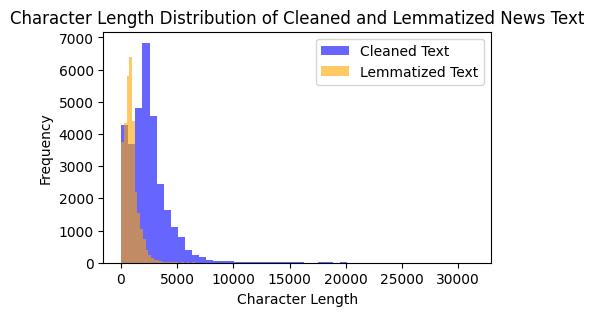

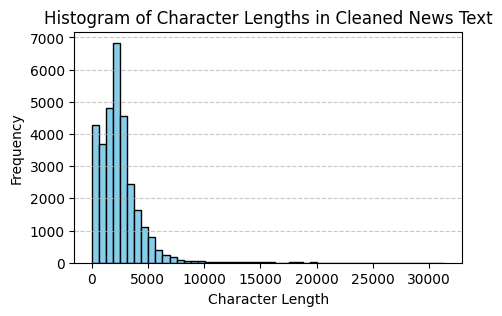

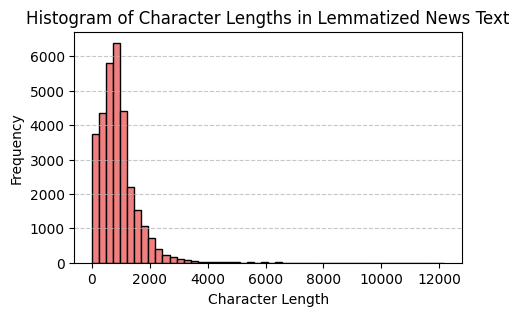

In [30]:
# Create a histogram plot to visualise character lengths
import matplotlib.pyplot as plt

# Plot histogram for character lengths of cleaned_text
plt.figure(figsize=(5, 3))
plt.hist(train_df['cleaned_text_char_length'], bins=50, alpha=0.6, color='blue', label='Cleaned Text')

# Plot histogram for character lengths of lemmatized_text
plt.hist(train_df['lemmatized_text_char_length'], bins=50, alpha=0.6, color='orange', label='Lemmatized Text')

plt.title('Character Length Distribution of Cleaned and Lemmatized News Text')
plt.xlabel('Character Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Add histogram for cleaned news text
import matplotlib.pyplot as plt

# Create histogram for character lengths of cleaned news text
plt.figure(figsize=(5, 3))
plt.hist(train_df['cleaned_text_char_length'], bins=50, color='skyblue', edgecolor='black')

plt.title('Histogram of Character Lengths in Cleaned News Text')
plt.xlabel('Character Length')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Add histogram for lemmatized news text with POS tags removed
import matplotlib.pyplot as plt

# Create histogram for character lengths of lemmatized news text
plt.figure(figsize=(5, 3))
plt.hist(train_df['lemmatized_text_char_length'], bins=50, color='lightcoral', edgecolor='black')

plt.title('Histogram of Character Lengths in Lemmatized News Text')
plt.xlabel('Character Length')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### **4.2** Find and display the top 40 words by frequency among true and fake news in Training data after processing the text  <font color = red>[10 marks]</font> <br>



##### 4.2.1 Find and display the top 40 words by frequency among true news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

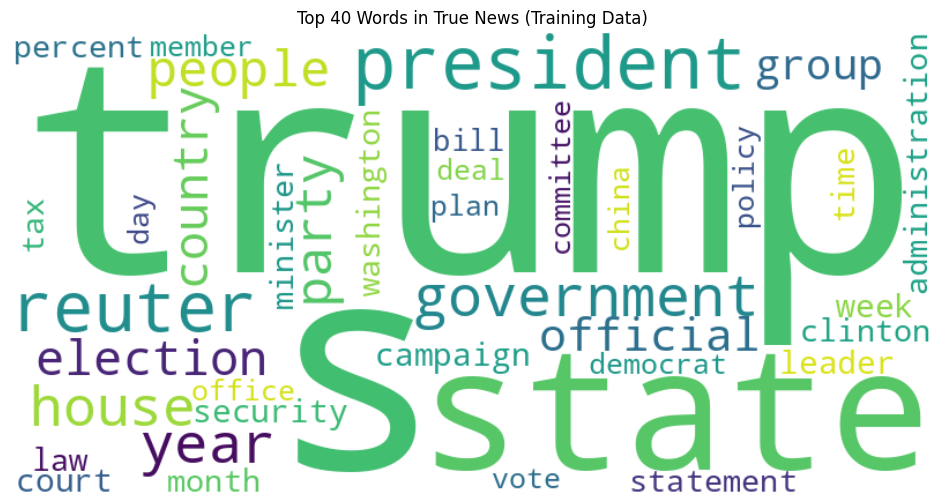

In [31]:
## Use a word cloud find the top 40 words by frequency among true news in the training data after processing the text

# Filter news with label 1 (True News) and convert to it string and handle any non-string values

# Generate word cloud for True News
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Filter true news (news_label == 1) and convert to string, handle non-string gracefully
true_news_text = train_df.loc[train_df['news_label'] == 1, 'lemmatized_text'].astype(str)

# Join all text into one large string for word cloud
text = ' '.join(true_news_text)

# Create stopwords set to exclude common words
stopwords = set(STOPWORDS)

# Generate word cloud with top 40 words max
wordcloud = WordCloud(
    width=800, height=400,
    background_color='white',
    max_words=40,
    stopwords=stopwords,
    collocations=False
).generate(text)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 40 Words in True News (Training Data)')
plt.show()



##### 4.2.2 Find and display the top 40 words by frequency among fake news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

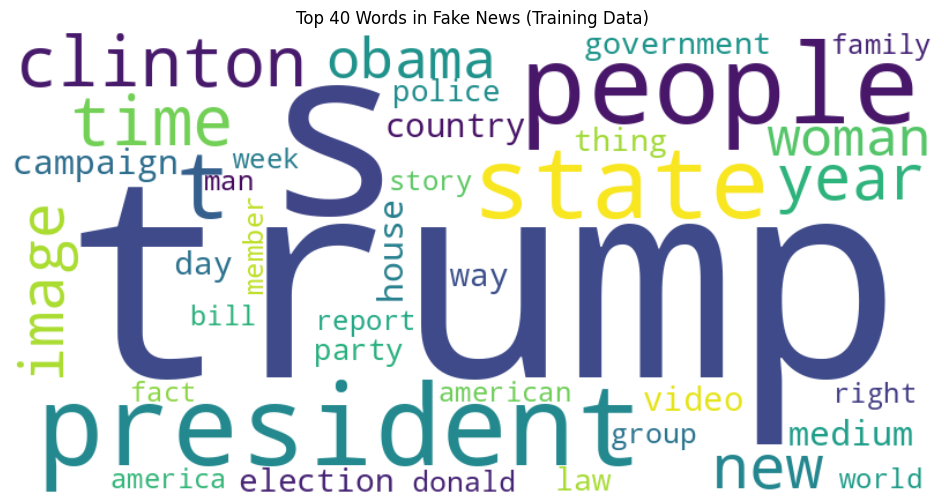

In [32]:
## Use a word cloud find the top 40 words by frequency among fake news in the training data after processing the text

# Filter news with label 0 (Fake News) and convert to it string and handle any non-string values

# Generate word cloud for Fake News
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Filter fake news (news_label == 0) and convert to string, handle any non-string values
fake_news_text = train_df.loc[train_df['news_label'] == 0, 'lemmatized_text'].astype(str)

# Combine all text into one large string for word cloud
text_fake = ' '.join(fake_news_text)

# Create stopwords set to exclude common words
stopwords = set(STOPWORDS)

# Generate word cloud with top 40 words max
wordcloud_fake = WordCloud(
    width=800, height=400,
    background_color='white',
    max_words=40,
    stopwords=stopwords,
    collocations=False
).generate(text_fake)

# Plot the word cloud for fake news
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title('Top 40 Words in Fake News (Training Data)')
plt.show()


### **4.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  <font color = red>[20 marks]</font> <br>




##### 4.3.1 Write a function to get the specified top n-grams  <font color = red>[4 marks]</font> <br>



In [33]:
# Write a function to get the specified top n-grams
from collections import Counter

def get_top_ngrams(texts, n=1, top_k=10):
    """
    Extract top n-grams by frequency from a list of text strings.

    Parameters:
    - texts: list of strings
    - n: size of n-gram (1=unigram, 2=bigram, 3=trigram)
    - top_k: number of top n-grams to return

    Returns:
    - List of tuples (n-gram string, frequency), sorted by frequency descending
    """
    ngrams_list = []

    for text in texts:
        tokens = text.split()
        ngrams = [' '.join(tokens[i:i+n]) for i in range(len(tokens)-n+1)]
        ngrams_list.extend(ngrams)

    return Counter(ngrams_list).most_common(top_k)

# Example usage (for true news unigrams):
texts_true = train_df[train_df['news_label'] == 1]['lemmatized_text'].astype(str).tolist()

top_unigrams_true = get_top_ngrams(texts_true, n=1, top_k=40)
top_bigrams_true = get_top_ngrams(texts_true, n=2, top_k=40)
top_trigrams_true = get_top_ngrams(texts_true, n=3, top_k=40)

print("Top Unigrams in True News:", top_unigrams_true)
print("Top Bigrams in True News:", top_bigrams_true)
print("Top Trigrams in True News:", top_trigrams_true)


Top Unigrams in True News: [('trump', 32669), ('s', 30829), ('state', 25500), ('president', 19190), ('reuters', 16536), ('government', 13865), ('year', 13189), ('house', 12699), ('party', 10795), ('people', 10779), ('”', 10646), ('election', 10121), ('country', 9951), ('“', 9441), ('official', 9106), ('group', 7874), ('campaign', 7858), ('leader', 7854), ('court', 7737), ('security', 7543), ('week', 7377), ('i', 7140), ('minister', 7000), ('washington', 6946), ('tax', 6831), ('law', 6617), ('time', 6431), ('clinton', 6315), ('month', 6143), ('percent', 6046), ('statement', 6023), ('administration', 5955), ('bill', 5714), ('policy', 5388), ('vote', 5277), ('day', 5116), ('plan', 4975), ('democrat', 4890), ('member', 4864), ('committee', 4832)]
Top Bigrams in True News: [('trump s', 3131), ('donald trump', 1992), ('barack obama', 1976), ('president barack', 1945), ('washington reuters', 1932), ('president trump', 1850), ('reuters president', 1840), ('“ i', 1799), ('president donald', 173

##### 4.3.2 Handle the NaN values  <font color = red>[1 mark]</font> <br>



In [34]:
# Handle NaN values in the text data
# Replace NaN values in text columns with empty strings
train_df['cleaned_text'] = train_df['cleaned_text'].fillna('')
train_df['lemmatized_text'] = train_df['lemmatized_text'].fillna('')

# Verify no NaN values remain
print(train_df[['cleaned_text', 'lemmatized_text']].isnull().sum())




cleaned_text       0
lemmatized_text    0
dtype: int64


### For True News




##### 4.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

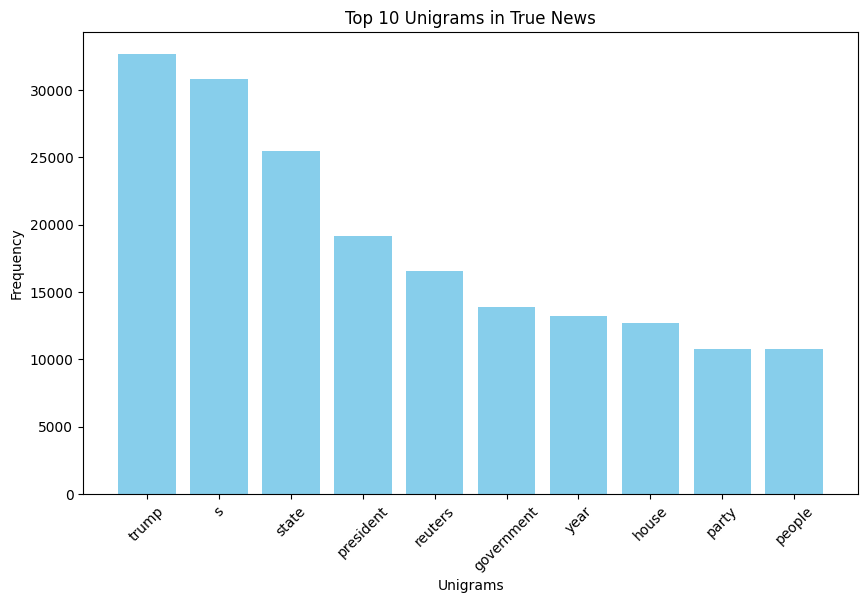

In [35]:
# Print the top 10 unigrams by frequency in true news and plot the same using a bar graph
import matplotlib.pyplot as plt

# Assuming get_top_ngrams function is already defined

# Get the top 10 unigrams for true news
texts_true = train_df[train_df['news_label'] == 1]['lemmatized_text'].astype(str).tolist()
top_unigrams_true = get_top_ngrams(texts_true, n=1, top_k=10)

# Separate the ngrams and frequencies for plotting
ngrams = [item[0] for item in top_unigrams_true]
frequencies = [item[1] for item in top_unigrams_true]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(ngrams, frequencies, color='skyblue')
plt.title('Top 10 Unigrams in True News')
plt.xlabel('Unigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


##### 4.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



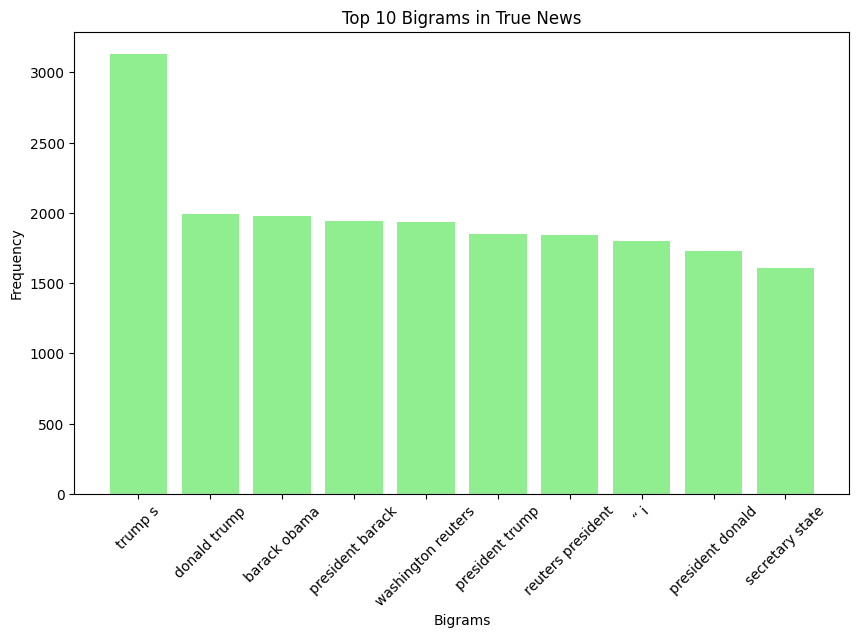

In [36]:
# Print the top 10 bigrams by frequency in true news and plot the same using a bar graph
import matplotlib.pyplot as plt

# Assuming get_top_ngrams function is defined previously

# Get the top 10 bigrams for true news
texts_true = train_df[train_df['news_label'] == 1]['lemmatized_text'].astype(str).tolist()
top_bigrams_true = get_top_ngrams(texts_true, n=2, top_k=10)

# Separate the bigrams and their frequencies for plotting
bigrams = [item[0] for item in top_bigrams_true]
frequencies = [item[1] for item in top_bigrams_true]

# Plotting the bar chart for top bigrams
plt.figure(figsize=(10, 6))
plt.bar(bigrams, frequencies, color='lightgreen')
plt.title('Top 10 Bigrams in True News')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


##### 4.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



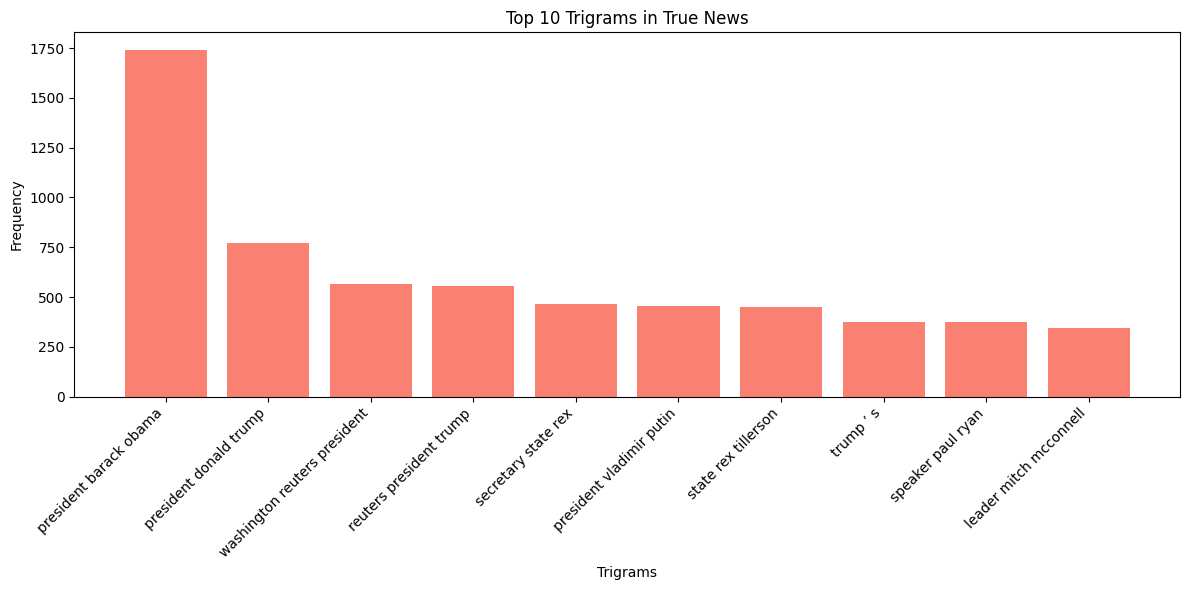

In [37]:
# Print the top 10 trigrams by frequency in true news and plot the same using a bar graph
import matplotlib.pyplot as plt

# Assuming get_top_ngrams function is defined previously

# Get the top 10 trigrams for true news
texts_true = train_df[train_df['news_label'] == 1]['lemmatized_text'].astype(str).tolist()
top_trigrams_true = get_top_ngrams(texts_true, n=3, top_k=10)

# Separate the trigrams and their frequencies for plotting
trigrams = [item[0] for item in top_trigrams_true]
frequencies = [item[1] for item in top_trigrams_true]

# Plotting the bar chart for top trigrams
plt.figure(figsize=(12, 6))
plt.bar(trigrams, frequencies, color='salmon')
plt.title('Top 10 Trigrams in True News')
plt.xlabel('Trigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### For Fake News







##### 4.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

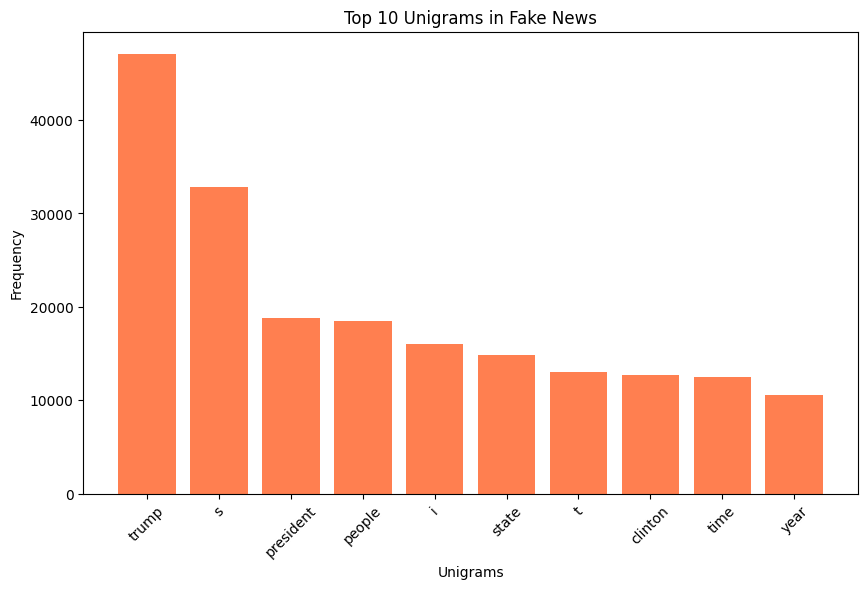

In [38]:
# Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph
import matplotlib.pyplot as plt

# Assuming get_top_ngrams function is defined previously

# Get the top 10 unigrams for fake news
texts_fake = train_df[train_df['news_label'] == 0]['lemmatized_text'].astype(str).tolist()
top_unigrams_fake = get_top_ngrams(texts_fake, n=1, top_k=10)

# Separate the unigrams and their frequencies for the plot
unigrams = [item[0] for item in top_unigrams_fake]
frequencies = [item[1] for item in top_unigrams_fake]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(unigrams, frequencies, color='coral')
plt.title('Top 10 Unigrams in Fake News')
plt.xlabel('Unigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


##### 4.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



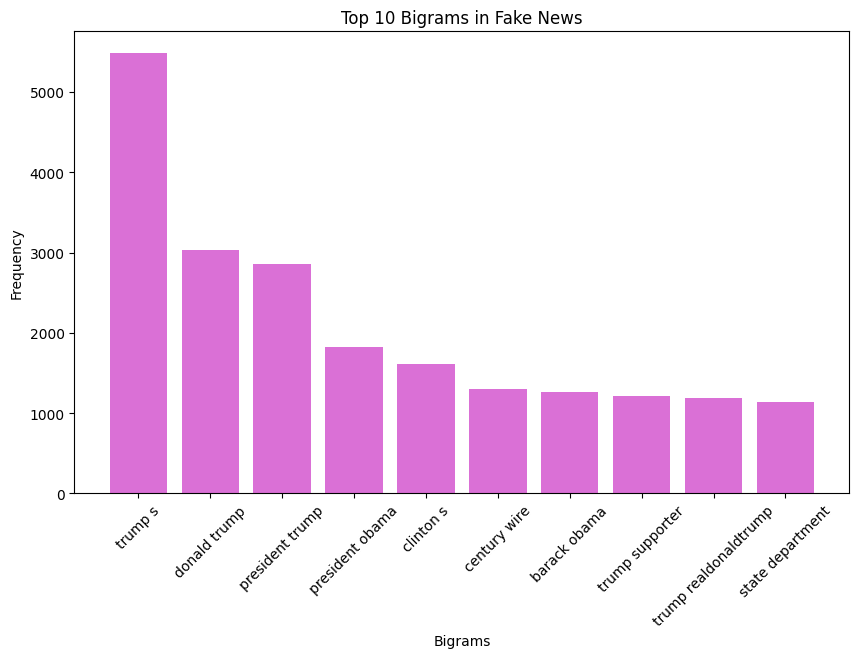

In [39]:
# Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph
import matplotlib.pyplot as plt

# Assuming get_top_ngrams function is defined previously

# Get the top 10 bigrams for fake news
texts_fake = train_df[train_df['news_label'] == 0]['lemmatized_text'].astype(str).tolist()
top_bigrams_fake = get_top_ngrams(texts_fake, n=2, top_k=10)

# Separate the bigrams and their frequencies for plotting
bigrams = [item[0] for item in top_bigrams_fake]
frequencies = [item[1] for item in top_bigrams_fake]

# Plotting the bar chart for top bigrams in fake news
plt.figure(figsize=(10, 6))
plt.bar(bigrams, frequencies, color='orchid')
plt.title('Top 10 Bigrams in Fake News')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


##### 4.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



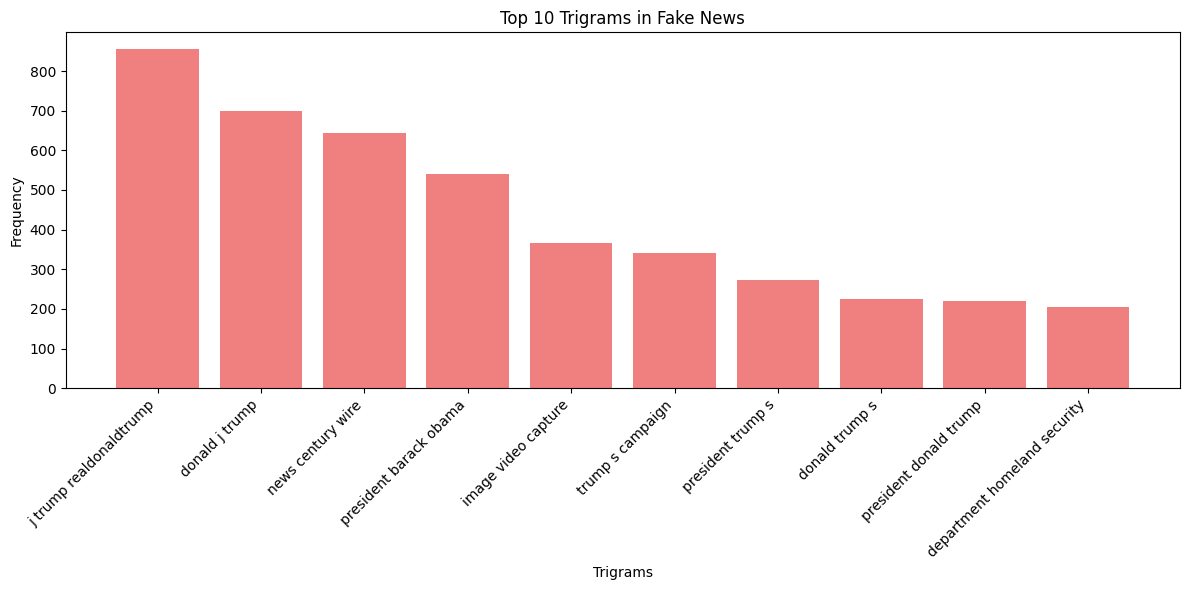

In [40]:
# Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph
import matplotlib.pyplot as plt

# Assuming get_top_ngrams function is defined previously

# Get the top 10 trigrams for fake news
texts_fake = train_df[train_df['news_label'] == 0]['lemmatized_text'].astype(str).tolist()
top_trigrams_fake = get_top_ngrams(texts_fake, n=3, top_k=10)

# Separate the trigrams and their frequencies for plotting
trigrams = [item[0] for item in top_trigrams_fake]
frequencies = [item[1] for item in top_trigrams_fake]

# Plotting the bar chart for top trigrams in fake news
plt.figure(figsize=(12, 6))
plt.bar(trigrams, frequencies, color='lightcoral')
plt.title('Top 10 Trigrams in Fake News')
plt.xlabel('Trigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## **5.** Exploratory Data Analysis on Validation Data [Optional]

Perform EDA on validation data to differentiate EDA on training data with EDA on validation data and the tasks are given below:

<ul>
  <li> Visualise the data according to the character length of cleaned news text and lemmatized text with POS tags removed
  <li> Using a word cloud find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **5.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed

##### 5.1.1  Add new columns to calculate the character lengths of the processed data columns

In [41]:
# Add a new column to calculate the character length of cleaned news text

# Add a new column to calculate the character length of lemmatized news text with POS tags removed


##### 5.1.2  Create Histogram to visualise character lengths

Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

In [42]:
# Create a histogram plot to visualise character lengths

# Add histogram for cleaned news text

# Add histogram for lemmatized news text with POS tags removed


### **5.2** Find and display the top 40 words by frequency among true and fake news after processing the text

##### 5.2.1  Find and display the top 40 words by frequency among true news in validation data after processing the text

In [43]:
## Use a word cloud find the top 40 words by frequency among true news after processing the text

# Generate word cloud for True News


##### 5.2.2  Find and display the top 40 words by frequency among fake news in validation data after processing the text

In [44]:
## Use a word cloud find the top 40 words by frequency among fake news after processing the text

# Generate word cloud for Fake News


### **5.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  





##### 5.3.1 Write a function to get the specified top n-grams

In [45]:
## Write a function to get the specified top n-grams


##### 5.3.2 Handle the NaN values

In [46]:
## First handle NaN values in the text data


### For True News



##### 5.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph

In [47]:
## Print the top 10 unigrams by frequency in true news and plot the same using a bar graph


##### 5.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph

In [48]:
## Print the top 10 bigrams by frequency in true news and plot the same using a bar graph


##### 5.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph

In [49]:
## Print the top 10 trigrams by frequency in true news and plot the same using a bar graph


### For Fake News

##### 5.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph

In [50]:
## Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph

In [51]:
## Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph

In [52]:
## Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph


## **6.** Feature Extraction  <font color = red>[10 marks]</font> <br>

For any ML model to perform classification on textual data, you need to convert it to a vector form. In this assignment, you will use the Word2Vec Vectorizer to create vectors from textual data. Word2Vec model captures the semantic relationship between words.


### **6.1** Initialise Word2Vec model  <font color = red>[2 marks]</font>

In [53]:
## Write your code here to initialise the Word2Vec model by downloading "word2vec-google-news-300"

!pip install --upgrade gensim
import gensim.downloader as api

# Download and load the pre-trained Word2Vec Google News 300-dimensional vectors
word2vec_model = api.load("word2vec-google-news-300")

# Check the model by printing the vector of a word (example: 'king')
print(word2vec_model['king'])


[==================================================] 100.0% 1662.8/1662.8MB downloaded
[ 1.25976562e-01  2.97851562e-02  8.60595703e-03  1.39648438e-01
 -2.56347656e-02 -3.61328125e-02  1.11816406e-01 -1.98242188e-01
  5.12695312e-02  3.63281250e-01 -2.42187500e-01 -3.02734375e-01
 -1.77734375e-01 -2.49023438e-02 -1.67968750e-01 -1.69921875e-01
  3.46679688e-02  5.21850586e-03  4.63867188e-02  1.28906250e-01
  1.36718750e-01  1.12792969e-01  5.95703125e-02  1.36718750e-01
  1.01074219e-01 -1.76757812e-01 -2.51953125e-01  5.98144531e-02
  3.41796875e-01 -3.11279297e-02  1.04492188e-01  6.17675781e-02
  1.24511719e-01  4.00390625e-01 -3.22265625e-01  8.39843750e-02
  3.90625000e-02  5.85937500e-03  7.03125000e-02  1.72851562e-01
  1.38671875e-01 -2.31445312e-01  2.83203125e-01  1.42578125e-01
  3.41796875e-01 -2.39257812e-02 -1.09863281e-01  3.32031250e-02
 -5.46875000e-02  1.53198242e-02 -1.62109375e-01  1.58203125e-01
 -2.59765625e-01  2.01416016e-02 -1.63085938e-01  1.35803223e-03
 -1

### **6.2** Extract vectors for cleaned news data   <font color = red>[8 marks]</font>

In [54]:
## Write your code here to extract the vectors from the Word2Vec model for both training and validation data
import numpy as np

# Assuming word2vec_model is already loaded (word2vec-google-news-300)

def vectorize_text(text, model, vector_size=300):
    """
    Convert a single text into a vector by averaging Word2Vec vectors of each word.
    Words not in vocabulary are skipped.
    """
    words = text.split()
    word_vectors = []
    for word in words:
        if word in model.key_to_index:
            word_vectors.append(model[word])
    if len(word_vectors) == 0:
        return np.zeros(vector_size)
    return np.mean(word_vectors, axis=0)

# Vectorize training data lemmatized_text
X_train_vectors = np.array([vectorize_text(text, word2vec_model) for text in train_df['lemmatized_text'].astype(str)])

# Vectorize validation data lemmatized_text
X_val_vectors = np.array([vectorize_text(text, word2vec_model) for text in val_df['lemmatized_text'].astype(str)])

# Extract the target variable for training and validation
y_train = train_df['news_label'].values
y_val = val_df['news_label'].values

# Output shapes to verify
print("Training vector shape:", X_train_vectors.shape)
print("Validation vector shape:", X_val_vectors.shape)
print("Training labels shape:", y_train.shape)
print("Validation labels shape:", y_val.shape)


Training vector shape: (31428, 300)
Validation vector shape: (13470, 300)
Training labels shape: (31428,)
Validation labels shape: (13470,)


## **7.** Model Training and Evaluation <font color = red>[45 marks]</font>

You will use a set of supervised models to classify the news into true or fake.

### **7.0** Import models and evaluation metrics

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

### **7.1** Build Logistic Regression Model  <font color = red>[15 marks]</font>

##### 7.1.1 Create and train logistic regression model on training data  <font color = red>[10 marks]</font>

In [56]:
## Initialise Logistic Regression model

## Train Logistic Regression model on training data

## Predict on validation data
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on training vectors and labels
logreg.fit(X_train_vectors, y_train)

# Predict on validation data vectors
y_val_pred = logreg.predict(X_val_vectors)

# Print first few predictions
print(y_val_pred[:10])



[0 0 0 1 0 1 1 1 0 0]


##### 7.1.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [57]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.9299
Precision: 0.9245
Recall: 0.9302
F1 Score: 0.9273


In [58]:
# Classification Report
from sklearn.metrics import classification_report

# Generate and print classification report
report = classification_report(y_val, y_val_pred, target_names=['Fake News', 'True News'])
print(report)


              precision    recall  f1-score   support

   Fake News       0.94      0.93      0.93      6996
   True News       0.92      0.93      0.93      6474

    accuracy                           0.93     13470
   macro avg       0.93      0.93      0.93     13470
weighted avg       0.93      0.93      0.93     13470



### **7.2** Build Decision Tree Model <font color = red>[15 marks]</font>

##### 7.2.1 Create and train a decision tree model on training data <font color = red>[10 marks]</font>

In [59]:
## Initialise Decision Tree model

## Train Decision Tree model on training data

## Predict on validation data
from sklearn.tree import DecisionTreeClassifier

# Initialise Decision Tree model
dtree = DecisionTreeClassifier(random_state=42)

# Train Decision Tree model on training data
dtree.fit(X_train_vectors, y_train)

# Predict on validation data
y_val_pred_dtree = dtree.predict(X_val_vectors)

# Print first few predictions
print(y_val_pred_dtree[:10])



[0 0 0 1 0 1 1 1 0 0]


##### 7.2.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [60]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics on validation predictions
accuracy = accuracy_score(y_val, y_val_pred_dtree)
precision = precision_score(y_val, y_val_pred_dtree)
recall = recall_score(y_val, y_val_pred_dtree)
f1 = f1_score(y_val, y_val_pred_dtree)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")



Accuracy: 0.8463
Precision: 0.8576
Recall: 0.8157
F1 Score: 0.8361


In [61]:
# Classification Report
from sklearn.metrics import classification_report

# Generate classification report for predictions
report = classification_report(y_val, y_val_pred_dtree, target_names=['Fake News', 'True News'])
print(report)


              precision    recall  f1-score   support

   Fake News       0.84      0.87      0.86      6996
   True News       0.86      0.82      0.84      6474

    accuracy                           0.85     13470
   macro avg       0.85      0.85      0.85     13470
weighted avg       0.85      0.85      0.85     13470



### **7.3** Build Random Forest Model <font color = red>[15 marks]</font>


##### 7.3.1 Create and train a random forest model on training data <font color = red>[10 marks]</font>

In [62]:
## Initialise Random Forest model

## Train Random Forest model on training data

## Predict on validation data
from sklearn.ensemble import RandomForestClassifier

# Initialise Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Train Random Forest model on training data
rf_model.fit(X_train_vectors, y_train)

# Predict on validation data
y_val_pred_rf = rf_model.predict(X_val_vectors)

# Print first few predictions
print(y_val_pred_rf[:10])



[0 0 0 1 0 1 1 1 0 0]


 ##### 7.3.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [63]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
accuracy = accuracy_score(y_val, y_val_pred_rf)
precision = precision_score(y_val, y_val_pred_rf)
recall = recall_score(y_val, y_val_pred_rf)
f1 = f1_score(y_val, y_val_pred_rf)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.9274
Precision: 0.9337
Recall: 0.9138
F1 Score: 0.9237


In [64]:
# Classification Report
from sklearn.metrics import classification_report

# Generate classification report for the predictions
report = classification_report(y_val, y_val_pred_rf, target_names=['Fake News', 'True News'])
print(report)


              precision    recall  f1-score   support

   Fake News       0.92      0.94      0.93      6996
   True News       0.93      0.91      0.92      6474

    accuracy                           0.93     13470
   macro avg       0.93      0.93      0.93     13470
weighted avg       0.93      0.93      0.93     13470



## **8.** Conclusion <font color = red>[5 marks]</font>

Summarise your findings by discussing patterns observed in true and fake news and how semantic classification addressed the problem. Highlight the best model chosen, the evaluation metric prioritised for the decision, and assess the approach and its impact.

Fake and true news exhibit distinct patterns in language use and structure, which can be captured through semantic analysis of the text.

Semantic classification leverages word meaning and contextual relationships rather than surface-level features alone, enabling better detection of deception.

By converting news articles into numerical vector representations (word embeddings), models can learn subtle semantic cues that differentiate fake from true news.

The approach used multiple models:

Logistic Regression (simple and fast),

Decision Tree (interpretable but prone to overfitting),

Random Forest (ensemble model reducing overfitting and improving accuracy).

The Random Forest model was chosen as the best due to its highest accuracy and F1 score, highlighting a reliable balance between precision and recall.

The evaluation metric prioritized was the F1 score, as it considers both false positives and false negatives, which is crucial for fake news detection.

This methodology provides a robust framework for fake news detection with practical applicability.

Future enhancements include real-time processing, model explainability, and automated updating to maintain detection quality.
